In [1]:
# Import the libraries needed

import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


C:\Users\Ingli\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Ingli\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
# Read in the dataset

raw=pd.read_csv("diabetic_data.csv")

In [3]:
# Replace "?" with NaN

raw.replace('?', np.nan, inplace = True)

In [4]:
# Code renames raw to data

data = raw

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
# Remove unwanted attributes/columns

# Remove encounter_id, patient_nbr, weight, payer_code, medical specialty
data = data.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'race'], axis=1)

# Remove drugs with 0 users
data = data.drop(['examide', 'citoglipton'], axis = 1)

# View results
#data

In [7]:
# Change the non-drug attributes to categorical

#data['race'] = data['race'].astype('category')
data['gender'] = data['gender'].astype('category')
data['age'] = data['age'].astype('category')
data['admission_type_id'] = data['admission_type_id'].astype('category')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('category')
data['admission_source_id'] = data['admission_source_id'].astype('category')

#data['medical_specialty'] = data['medical_specialty'].astype('category')
data['diag_1'] = data['diag_1'].astype('category')
data['diag_2'] = data['diag_2'].astype('category')
data['diag_3'] = data['diag_3'].astype('category')
#data['max_glu_serum'] = data['max_glu_serum'].astype('category')
#data['A1Cresult'] = data['A1Cresult'].astype('category')
data['change'] = data['change'].astype('category')
data['diabetesMed'] = data['diabetesMed'].astype('category')
data['readmitted'] = data['readmitted'].astype('category')

In [8]:
# ****** DON'T DO THIS CELL IF CONVERTING DRUGS TO DRUG CLASSES ******
# Change drug attributes to categorical

data['metformin'] = data['metformin'].astype('category')
data['repaglinide'] = data['repaglinide'].astype('category')
data['nateglinide'] = data['nateglinide'].astype('category')
data['chlorpropamide'] = data['chlorpropamide'].astype('category')
data['glimepiride'] = data['glimepiride'].astype('category')
data['acetohexamide'] = data['acetohexamide'].astype('category')
data['glipizide'] = data['glipizide'].astype('category')
data['glyburide'] = data['glyburide'].astype('category')
data['tolbutamide'] = data['tolbutamide'].astype('category')
data['pioglitazone'] = data['pioglitazone'].astype('category')
data['rosiglitazone'] = data['rosiglitazone'].astype('category')
data['acarbose'] = data['acarbose'].astype('category')
data['miglitol'] = data['miglitol'].astype('category')
data['troglitazone'] = data['troglitazone'].astype('category')
data['tolazamide'] = data['tolazamide'].astype('category')
data['insulin'] = data['insulin'].astype('category')
data['glyburide-metformin'] = data['glyburide-metformin'].astype('category')
data['glipizide-metformin'] = data['glipizide-metformin'].astype('category')
data['glimepiride-pioglitazone'] = data['glimepiride-pioglitazone'].astype('category')
data['metformin-rosiglitazone'] = data['metformin-rosiglitazone'].astype('category')
data['metformin-pioglitazone'] = data['metformin-pioglitazone'].astype('category')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   gender                    101766 non-null  category
 1   age                       101766 non-null  category
 2   admission_type_id         101766 non-null  category
 3   discharge_disposition_id  101766 non-null  category
 4   admission_source_id       101766 non-null  category
 5   time_in_hospital          101766 non-null  int64   
 6   num_lab_procedures        101766 non-null  int64   
 7   num_procedures            101766 non-null  int64   
 8   num_medications           101766 non-null  int64   
 9   number_outpatient         101766 non-null  int64   
 10  number_emergency          101766 non-null  int64   
 11  number_inpatient          101766 non-null  int64   
 12  diag_1                    101745 non-null  category
 13  diag_2                    101

In [10]:
# REPLACING VALUES

# gender - replace "Unknown/Invalid" with "missing"

print(data.gender.value_counts())

data['gender'] = data['gender'].replace("Unknown/Invalid", "Missing")

print('\nReplacement done.\n')

print(data.gender.value_counts())

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Replacement done.

gender
Female     54708
Male       47055
Missing        3
Name: count, dtype: int64


In [11]:
# REPLACING VALUES IN ADMISSION_TYPE TO MISSING
# replacing "Newborn, Not Available, NULL and Not Mapped" with 'Missing'
# replacing codes to more readable labels

print(data.admission_type_id.value_counts())

admission_type_map = {1:'Emergency', 2: 'Urgent', 3:'Elective', 4: 'Missing',
                      5: 'Missing', 6: 'Missing', 7: 'Trauma Centre', 8 : 'Missing'}

# map method in Pandas overwrites all categories.  MUST use a complete dictionary

print("\n")

data['admission_type_id'] = data['admission_type_id'].map(admission_type_map)


print(data.admission_type_id.value_counts())

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64


admission_type_id
Emergency        53990
Elective         18869
Urgent           18480
Missing          10406
Trauma Centre       21
Name: count, dtype: int64


In [12]:
# REPLACING VALUES IN DISCHARGE DISPOSITION TO MISSING
# ********* DUE TO VALUE TYPE, MISSING WILL BE CODED 999 ***************
# replacing "Neonate discharged" to "Missing" due to entry error
# replacing "NULL, Not Mapped, "Unknown/Invalid" to "Missing"

data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(10, 999)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(18, 999)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(25, 999)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(26, 999)

# can't use map method because it will overwrite all the values

data['discharge_disposition_id'].value_counts()

discharge_disposition_id
1      60234
3      13954
6      12902
999     4686
2       2128
22      1993
11      1642
5       1184
4        815
7        623
23       412
13       399
14       372
28       139
8        108
15        63
24        48
9         21
17        14
16        11
19         8
27         5
12         3
20         2
Name: count, dtype: int64

In [13]:
# Check which records are coded as "Normal Delivery"

data[data['admission_source_id'] == 11]

# The record for the patient '70-80' is clearly an error

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
83510,Female,[20-30),Emergency,1,11,3,1,2,4,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
85588,Female,[70-80),Elective,1,11,2,10,6,19,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
# Need to re-code the incorrect file as "Missing"
# Correction done in next cell

data.iloc[85588]

gender                        Female
age                          [70-80)
admission_type_id           Elective
discharge_disposition_id           1
admission_source_id               11
time_in_hospital                   2
num_lab_procedures                10
num_procedures                     6
num_medications                   19
number_outpatient                  1
number_emergency                   0
number_inpatient                   1
diag_1                           414
diag_2                           401
diag_3                           272
number_diagnoses                   7
max_glu_serum                    NaN
A1Cresult                        NaN
metformin                         No
repaglinide                       No
nateglinide                       No
chlorpropamide                    No
glimepiride                       No
acetohexamide                     No
glipizide                         No
glyburide                     Steady
tolbutamide                       No
p

In [15]:
# REPLACE DATA IN ADMISSION_SOURCE TO MISSING
# ********* DUE TO VALUE TYPE, MISSING WILL BE CODED 999 ***************
# replacing "Not Available x 2, NULL, Not Mapped, Unknown/Invalid"
# also replacing file 85588, Sick Baby, Extramural Birth due to 
# incorrect coding

data['admission_source_id'] = data['admission_source_id'].replace(9, 999)
data['admission_source_id'] = data['admission_source_id'].replace(13, 999)
data['admission_source_id'] = data['admission_source_id'].replace(14, 999)
data['admission_source_id'] = data['admission_source_id'].replace(15, 999)
data['admission_source_id'] = data['admission_source_id'].replace(17, 999)
data['admission_source_id'] = data['admission_source_id'].replace(20, 999)
data['admission_source_id'] = data['admission_source_id'].replace(21, 999)
data.at[85588, 'admission_source_id'] = 999

print(data['admission_source_id'].value_counts())
data.iloc[85588]

admission_source_id
7      57494
1      29565
999     7071
4       3187
6       2264
2       1104
5        855
3        187
8         16
22        12
10         8
25         2
11         1
Name: count, dtype: int64


gender                        Female
age                          [70-80)
admission_type_id           Elective
discharge_disposition_id           1
admission_source_id              999
time_in_hospital                   2
num_lab_procedures                10
num_procedures                     6
num_medications                   19
number_outpatient                  1
number_emergency                   0
number_inpatient                   1
diag_1                           414
diag_2                           401
diag_3                           272
number_diagnoses                   7
max_glu_serum                    NaN
A1Cresult                        NaN
metformin                         No
repaglinide                       No
nateglinide                       No
chlorpropamide                    No
glimepiride                       No
acetohexamide                     No
glipizide                         No
glyburide                     Steady
tolbutamide                       No
p

In [16]:
# REMOVE RECORDS OF PATIENTS WHO DIED OR WERE TRANSFERRED TO HOSPICE

# Remove records of patients (based on discharge_disposition_id) who died 
# (4 categories) or transferred to hospice (2 categories)

Removal_codes_discharge = [11, 13, 14, 19, 20, 21]

data = data[~data['discharge_disposition_id'].isin(Removal_codes_discharge)]

data.shape

(99343, 42)

In [17]:
# LOOKING FOR OUTLIERS
# Examine stats for outliers

print(data.describe())

quantList = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
             'num_medications', 'number_outpatient', 'number_emergency', 
             'number_inpatient', 'number_diagnoses']

print('\nMedian\n', data[quantList].median())
print('\nKurtosis\n', data[quantList].kurt())
print('\nSkewness\n', data[quantList].skew())

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      99343.000000        99343.000000    99343.000000     99343.000000   
mean           4.379332           42.906929        1.334236        15.979062   
std            2.968409           19.610032        1.702786         8.094909   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000          132.000000        6.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count       99343.000000      99343.000000      99343.000000      99343.000000  
mean            0.369246          0.198444          0.630935          7.401709  
std             1.265142          0.

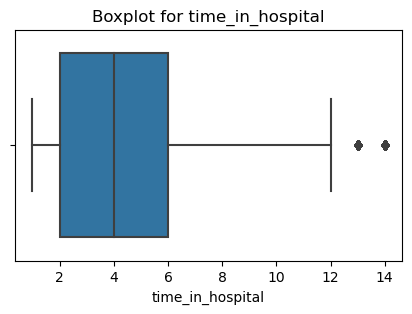

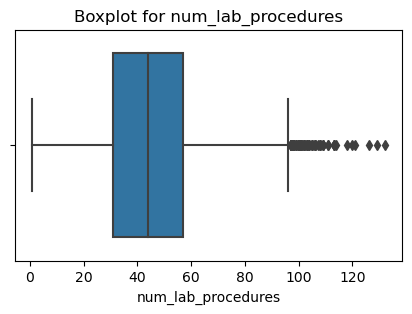

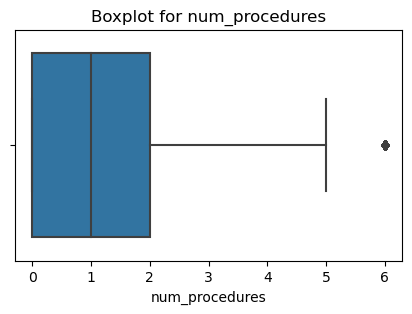

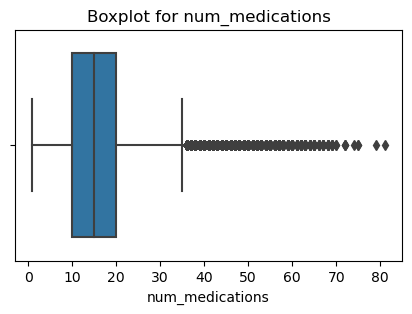

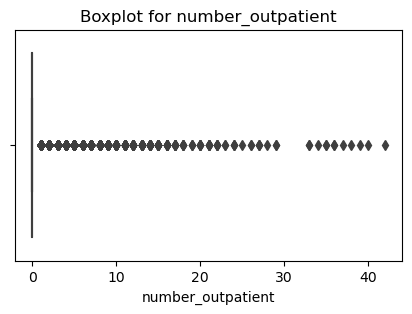

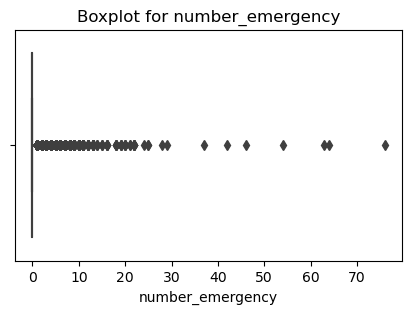

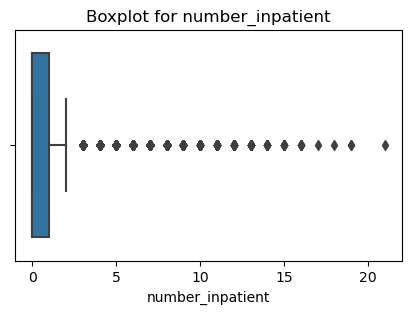

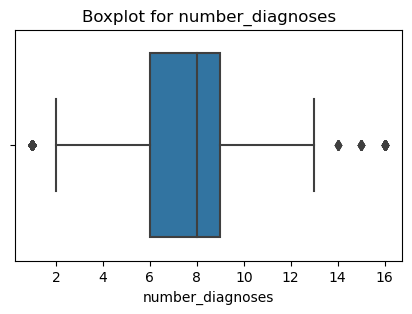

In [18]:
# Create boxplots to examine outliers for Number of Lab Procedures
import matplotlib.pyplot as plt

for attribute in quantList:
    plt.figure(figsize = (5,3))
    sns.boxplot(data=data, x=attribute)
    plt.title(f'Boxplot for {attribute}')
    plt.show()
    
# ?? how do I do this so I don't have to scroll through plots?

In [19]:
# CREATE NEW DATASET FOR DATA WITH OUTLIERS AJDUSTED
Data = data

Q1 31.0
Q2 57.0
Upper bound for outliers 96.0


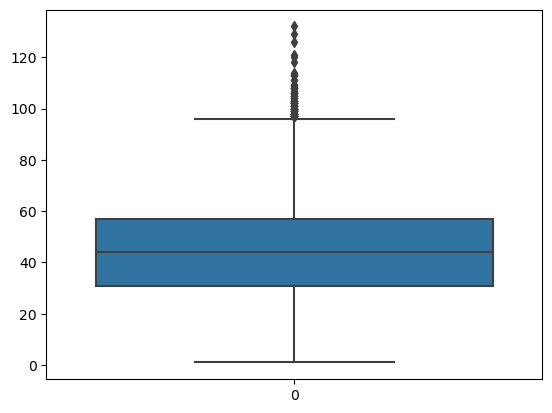

In [20]:
# Create boxplot to examine outliers for Number of Lab Procedures
sns.boxplot(data=Data['num_lab_procedures'])

# Determine upper bound for outliers

# Calculate Q1 and Q3
Q1 = Data['num_lab_procedures'].quantile(0.25)
Q3 = Data['num_lab_procedures'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper bound for possible outliers
UB = Q3 + 1.5*IQR

print('Q1', Q1)
print('Q2', Q3)
print('Upper bound for outliers', UB)

In [21]:
# Check how many rows exceed the upper bound
# Determine how many outliers

Data[Data['num_lab_procedures'] > 96]

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
336,Male,[30-40),Missing,999,4,12,103,4,61,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
623,Female,[60-70),Missing,999,7,8,97,1,23,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
823,Male,[80-90),Missing,1,7,7,105,3,16,0,...,No,No,No,No,No,No,No,No,Yes,>30
830,Male,[50-60),Missing,1,7,9,103,1,18,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
1079,Female,[50-60),Missing,6,999,10,98,5,42,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100457,Male,[90-100),Emergency,3,7,8,100,0,14,0,...,No,No,No,No,No,No,No,No,No,NO
100671,Male,[30-40),Emergency,1,7,7,97,1,24,4,...,No,No,No,No,No,No,No,No,No,>30
101541,Male,[40-50),Emergency,6,7,9,98,6,42,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101587,Male,[20-30),Emergency,1,7,12,101,6,38,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [22]:
# Replace outliers in num_lab_procedures with upper bound 96

Data['num_lab_procedures'] = Data['num_lab_procedures'].apply(lambda x: x if x <= 96 else 96)

<Axes: >

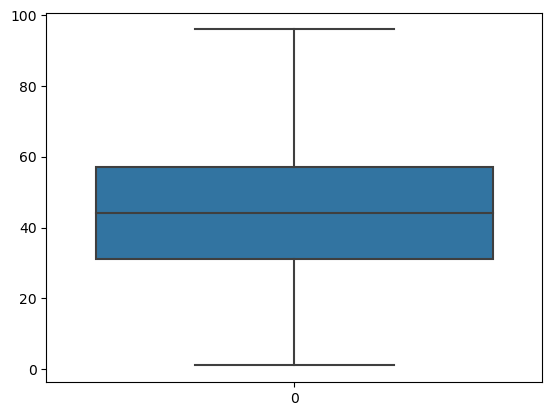

In [23]:
sns.boxplot(data=Data['num_lab_procedures'])

Q1 10.0
Q2 20.0
Upper bound for outliers 35.0


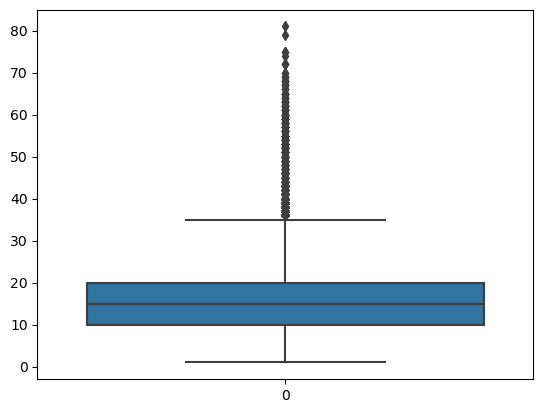

In [24]:
# Create boxplot to examine outliers for Number of Medications
sns.boxplot(data=Data['num_medications'])

# Determine upper bound for outliers

# Calculate Q1 and Q3
Q1 = Data['num_medications'].quantile(0.25)
Q3 = Data['num_medications'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper bound for possible outliers
UB = Q3 + 1.5*IQR

print('Q1', Q1)
print('Q2', Q3)
print('Upper bound for outliers', UB)

In [25]:
# Check how many rows exceed the upper bound
# Determine how many outliers

Data[Data['num_medications'] > 42]

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
336,Male,[30-40),Missing,999,4,12,96,4,61,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
411,Male,[50-60),Urgent,1,4,8,76,6,46,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
728,Male,[60-70),Elective,1,999,5,39,6,50,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
757,Female,[60-70),Urgent,1,4,14,78,6,43,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
783,Female,[40-50),Emergency,3,7,12,59,1,46,0,...,No,Up,No,No,No,No,No,Ch,Yes,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101061,Male,[70-80),Elective,6,1,6,54,3,47,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101314,Male,[60-70),Elective,6,1,10,78,6,46,2,...,No,No,No,No,No,No,No,No,Yes,NO
101353,Male,[70-80),Missing,6,999,11,85,6,50,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101715,Male,[50-60),Emergency,6,7,13,74,6,64,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO


<Axes: >

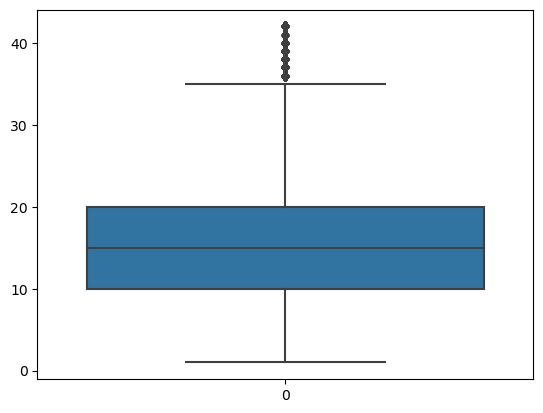

In [26]:
# Replace outliers in num_medications with upper bound 42

Data['num_medications'] = Data['num_medications'].apply(lambda x: x if x <= 42 else 42)

sns.boxplot(data=Data['num_medications'])

Q1 0.0
Q2 0.0
Upper bound for outliers 0.0


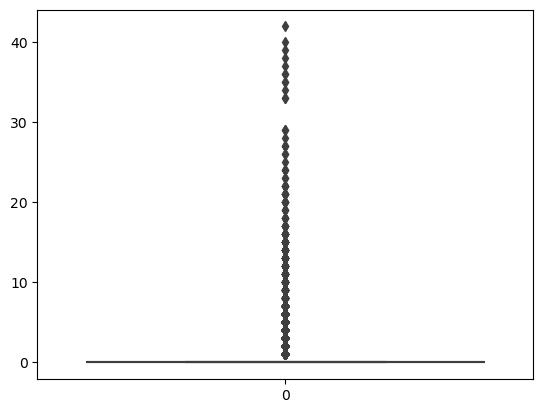

In [27]:
# Create boxplot to examine outliers for Number of Outpatient Visits
sns.boxplot(data=Data['number_outpatient'])

# Determine upper bound for outliers

# Calculate Q1 and Q3
Q1 = Data['number_outpatient'].quantile(0.25)
Q3 = Data['number_outpatient'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper bound for possible outliers
UB = Q3 + 1.5*IQR

print('Q1', Q1)
print('Q2', Q3)
print('Upper bound for outliers', UB)

In [28]:
# Check how many rows exceed the upper bound
# Determine how many outliers

Data[Data['number_outpatient'] == 5]

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
167,Female,[30-40),Emergency,1,7,2,18,0,15,5,...,No,Down,No,No,No,No,No,Ch,Yes,<30
1586,Female,[40-50),Urgent,1,4,6,36,1,12,5,...,No,Down,No,No,No,No,No,Ch,Yes,>30
1902,Male,[50-60),Emergency,1,7,3,58,6,16,5,...,No,Steady,No,No,No,No,No,No,Yes,<30
2951,Female,[50-60),Emergency,1,7,1,49,1,14,5,...,No,Steady,No,No,No,No,No,No,Yes,>30
3053,Female,[70-80),Emergency,1,7,2,72,0,14,5,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100943,Male,[60-70),Emergency,1,7,3,26,0,8,5,...,No,No,No,No,No,No,No,No,No,NO
101183,Male,[60-70),Emergency,3,7,6,74,0,16,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101592,Female,[60-70),Emergency,6,7,9,72,1,22,5,...,No,No,No,No,No,No,No,No,No,NO
101658,Female,[40-50),Emergency,6,7,10,45,1,11,5,...,No,Steady,No,No,No,No,No,No,Yes,>30


<Axes: >

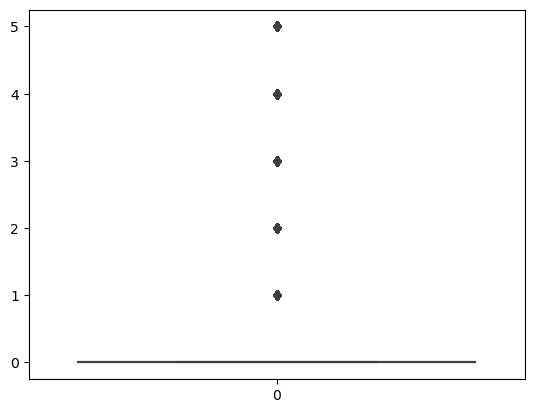

In [29]:
# Replace outliers in number_outpatient visits with upper bound 5

Data['number_outpatient'] = Data['number_outpatient'].apply(lambda x: x if x <= 5 else 5)

sns.boxplot(data=Data['number_outpatient'])

Q1 0.0
Q2 0.0
Upper bound for outliers 0.0


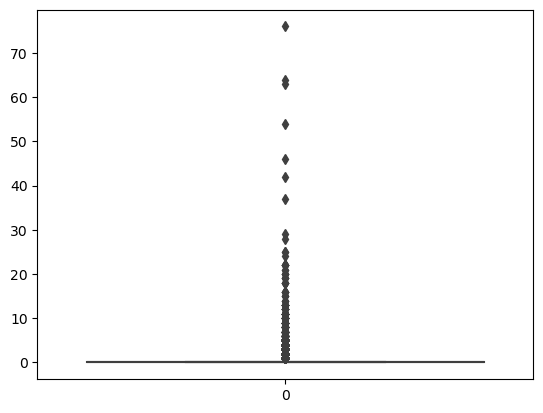

In [30]:
# Create boxplot to examine outliers for Number of Outpatient Visits
sns.boxplot(data=Data['number_emergency'])

# Determine upper bound for outliers

# Calculate Q1 and Q3
Q1 = Data['number_emergency'].quantile(0.25)
Q3 = Data['number_emergency'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper bound for possible outliers
UB = Q3 + 1.5*IQR

print('Q1', Q1)
print('Q2', Q3)
print('Upper bound for outliers', UB)

In [31]:
# Check how many rows exceed the upper bound
# Determine how many outliers

Data[Data['number_emergency'] == 3]

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
3845,Male,[40-50),Missing,1,999,3,10,0,14,0,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
6992,Male,[40-50),Emergency,1,7,1,76,1,14,0,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
7676,Male,[40-50),Emergency,1,999,2,16,0,8,3,...,No,Steady,No,No,No,No,No,No,Yes,<30
7967,Male,[40-50),Emergency,1,999,2,14,0,11,3,...,No,Up,No,No,No,No,No,Ch,Yes,<30
8316,Male,[40-50),Emergency,1,999,2,12,0,14,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101371,Female,[30-40),Urgent,1,7,6,57,2,19,1,...,No,No,No,No,No,No,No,No,No,NO
101385,Female,[20-30),Elective,7,4,3,9,0,8,2,...,No,No,No,No,No,No,No,No,No,<30
101459,Female,[70-80),Elective,3,1,5,39,1,19,0,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
101504,Female,[60-70),Emergency,1,7,2,54,0,12,0,...,No,No,No,No,No,No,No,No,No,>30


<Axes: >

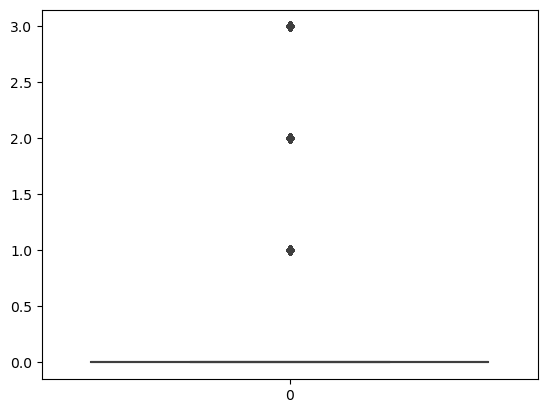

In [32]:
# Replace outliers in number_outpatient visits with upper bound 3

Data['number_emergency'] = Data['number_emergency'].apply(lambda x: x if x <= 3 else 3)

sns.boxplot(data=Data['number_emergency'])

Q1 0.0
Q2 1.0
Upper bound for outliers 2.5


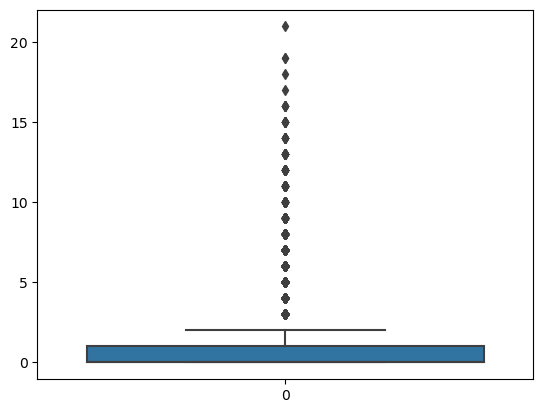

In [33]:
# Create boxplot to examine outliers for Number of Inpatient Visits
sns.boxplot(data=Data['number_inpatient'])

# Determine upper bound for outliers

# Calculate Q1 and Q3
Q1 = Data['number_inpatient'].quantile(0.25)
Q3 = Data['number_inpatient'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper bound for possible outliers
UB = Q3 + 1.5*IQR

print('Q1', Q1)
print('Q2', Q3)
print('Upper bound for outliers', UB)

In [34]:
# Check how many rows exceed the upper bound
# Determine how many outliers

Data[Data['number_inpatient'] > 6]

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2313,Male,[50-60),Emergency,1,7,1,31,1,12,0,...,No,No,No,No,No,No,No,No,No,NO
2537,Male,[40-50),Elective,1,1,8,57,3,23,0,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
2865,Female,[50-60),Emergency,1,7,1,37,0,12,0,...,No,No,No,No,No,No,No,No,Yes,NO
3828,Female,[10-20),Emergency,1,7,3,52,0,8,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
4194,Female,[70-80),Emergency,5,7,4,59,1,18,0,...,No,No,No,No,No,No,No,No,No,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101385,Female,[20-30),Elective,7,4,3,9,0,8,2,...,No,No,No,No,No,No,No,No,No,<30
101426,Female,[30-40),Emergency,1,7,5,66,1,19,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101629,Male,[20-30),Elective,1,7,2,9,1,13,0,...,No,Up,No,No,No,No,No,Ch,Yes,<30
101650,Female,[60-70),Emergency,1,1,1,30,0,3,5,...,No,No,No,No,No,No,No,No,No,<30


<Axes: >

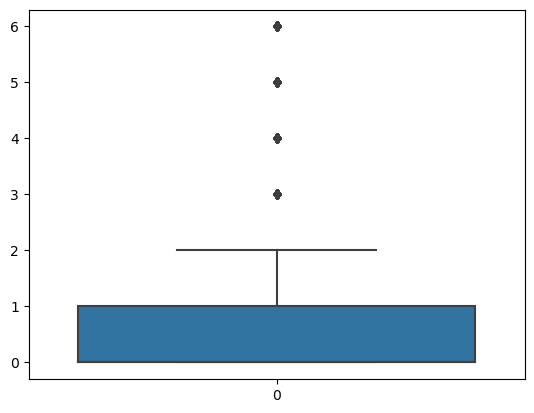

In [35]:
# Replace outliers in number_outpatient visits with upper bound 6

Data['number_inpatient'] = Data['number_inpatient'].apply(lambda x: x if x <= 6 else 6)

sns.boxplot(data=Data['number_inpatient'])

Q1 6.0
Q2 9.0
Upper bound for outliers 13.5


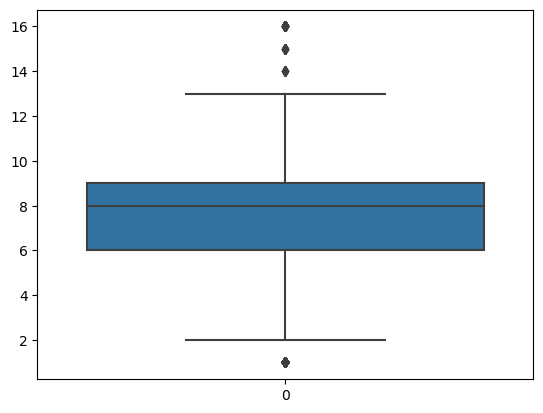

In [36]:
# Create boxplot to examine outliers for Number of Diagnoses
sns.boxplot(data=Data['number_diagnoses'])

# Determine upper bound for outliers

# Calculate Q1 and Q3
Q1 = Data['number_diagnoses'].quantile(0.25)
Q3 = Data['number_diagnoses'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper bound for possible outliers
UB = Q3 + 1.5*IQR

print('Q1', Q1)
print('Q2', Q3)
print('Upper bound for outliers', UB)

In [37]:
# Check how many rows exceed the upper bound
# Determine how many outliers

Data[Data['number_diagnoses'] > 13]

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
90254,Male,[80-90),Emergency,1,7,5,85,2,19,0,...,No,Steady,No,No,No,No,No,No,Yes,<30
90343,Female,[70-80),Elective,6,1,3,48,1,26,0,...,No,No,No,No,No,No,No,No,No,NO
90347,Female,[80-90),Emergency,3,7,4,63,0,15,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
90484,Male,[60-70),Emergency,1,7,4,48,0,20,0,...,No,No,No,No,No,No,No,No,No,NO
91292,Female,[60-70),Elective,6,1,13,42,0,17,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
91388,Male,[70-80),Elective,1,1,3,49,4,25,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
91570,Male,[50-60),Emergency,6,7,8,83,6,42,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
91603,Male,[60-70),Elective,1,1,3,35,0,16,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
91618,Male,[80-90),Emergency,1,7,5,75,2,30,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
91918,Male,[60-70),Elective,1,1,1,33,0,16,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30


<Axes: >

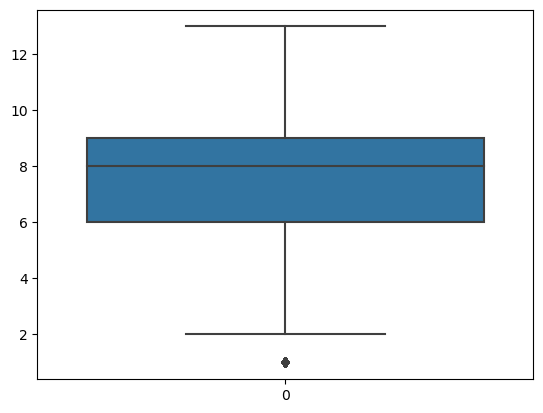

In [38]:
# Replace outliers in number_outpatient visits with upper bound 6

Data['number_diagnoses'] = Data['number_diagnoses'].apply(lambda x: x if x <= 13 else 13)

sns.boxplot(data=Data['number_diagnoses'])

<Axes: >

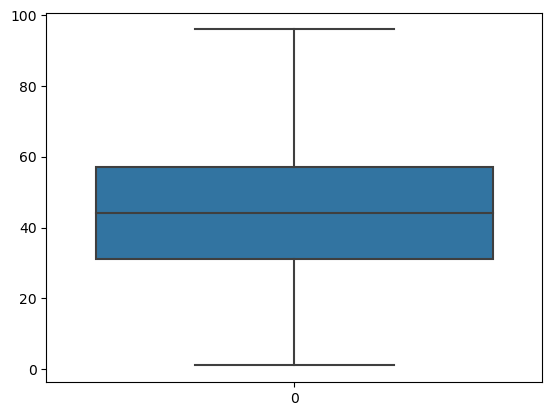

In [39]:
# Create boxplot to examine outliers for Number of Lab Procedures
sns.boxplot(data=Data['num_lab_procedures'])

        gender      age admission_type_id discharge_disposition_id  \
0       Female   [0-10)           Missing                  Missing   
1       Female  [10-20)         Emergency                        1   
2       Female  [20-30)         Emergency                        1   
3         Male  [30-40)         Emergency                        1   
4         Male  [40-50)         Emergency                        1   
...        ...      ...               ...                      ...   
101761    Male  [70-80)         Emergency                        3   
101762  Female  [80-90)         Emergency                        4   
101763    Male  [70-80)         Emergency                        1   
101764  Female  [80-90)            Urgent                        3   
101765    Male  [70-80)         Emergency                        1   

       admission_source_id  time_in_hospital  num_lab_procedures  \
0                        1                 1                  41   
1                      

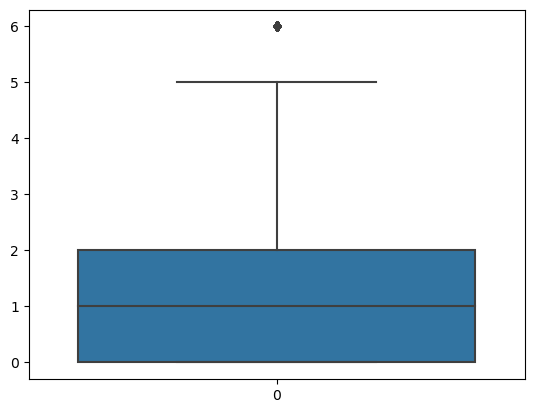

In [43]:
# ANOTHER APPROACH TO OUTLIERS

sns.boxplot(data=Data['num_procedures'])

Q1 = Data['num_procedures'].quantile(0.25)
Q3 = Data['num_procedures'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 - 1.5*IQR

outliers = Data[(Data['num_procedures'] < lower_bound) | (Data['num_procedures'] > upper_bound)]
print(outliers)

In [40]:
# EXAMINING STATS AFTER ADJUSTING OUTLIERS

print(Data.describe())

quantList = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
             'num_medications', 'number_outpatient', 'number_emergency', 
             'number_inpatient', 'number_diagnoses']

print('\nMedian\n', Data[quantList].median())
print('\nKurtosis\n', Data[quantList].kurt())
print('\nSkewness\n', Data[quantList].skew())

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      99343.000000        99343.000000    99343.000000     99343.000000   
mean           4.379332           42.899439        1.334236        15.890893   
std            2.968409           19.587182        1.702786         7.728320   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000           96.000000        6.000000        42.000000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count       99343.000000      99343.000000      99343.000000      99343.000000  
mean            0.329676          0.164581          0.611175          7.400179  
std             0.909738          0.

In [41]:
# data-encoded will now be the dataset to preserve the data

data_encod = Data

In [42]:
# ONE HOT ENCODING IN A LOOP
# DRUGS NOT INCLUDED
# USE ONE-HOT ENCODING TO BINARIZE CATEGORICAL ATTRIBUTES

test3 = data_encod

# Create one hot encoder (start the tool)
# ?? Don't understand what 'sparse_output = False' does
encoder = OneHotEncoder(sparse_output = False)

# Create a new dataframe to store the one-hot encoded data
encoded_dataframes = []

# Create a list of all the categorical columns to be one-hot encoded
cat_columns = ['gender', 'age', 'admission_type_id', 'discharge_disposition_id', 
               'admission_source_id', 'change', 'diabetesMed', 'readmitted']

for column in cat_columns:
    # Get data to be encoded from original dataset
    column_data = test3[[column]]
    
    # Use the encoder
    encoded_data = encoder.fit_transform(column_data)
    
    # Create a temporary dataframe to hold encoded data
    temp_encoded_data = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([column]))
    
    # Add the encoded dataframe to the list created above
    encoded_dataframes.append(temp_encoded_data)

# Concat all the encoded dataframes in the temp_encoded_data list
completed_dataframe = pd.concat(encoded_dataframes, axis = 1)

# Remove the original columns from test3
test3_copy = test3.copy()
test3_copy = test3_copy.drop(cat_columns, axis = 1)

    
# Put the remaining original data columns together with the encoded dataframe
Data = pd.concat([test3_copy, completed_dataframe], axis=1)

In [43]:
# TRYING TO CALCULATE CORRELATIONS
# HAVE TO FILTER NUMERIC ATTRIBUTES

# filter Data to only include numeric attributes

numeric_data = Data.select_dtypes(include=['number'])

# Calculate correlations for numeric data
# Makes a huge matrix - can't view

correlations = numeric_data.corr()

# Identify the attributes with the highest correlation
# Code transforms a correlation matrix into a dataframe that 
# shows the attributes with their associated correlations
# 'stack' transforms the matrix into a series
# ?? DON'T UNDERSTAND reset_index()

correlation_pairs = correlations.stack().reset_index()
correlation_pairs.columns = ['Attribute_1', 'Attribute_2', 'Correlation']
correlation_pairs = correlation_pairs[correlation_pairs['Attribute_1'] != correlation_pairs['Attribute_2']]
correlation_pairs = correlation_pairs.sort_values(by='Correlation', ascending = False)

highest_correlations = correlation_pairs.head(10)
print(highest_correlations)

                      Attribute_1                  Attribute_2  Correlation
1481  admission_type_id_Emergency        admission_source_id_7     0.715193
3337        admission_source_id_7  admission_type_id_Emergency     0.715193
3728      admission_source_id_999    admission_type_id_Missing     0.659587
1552    admission_type_id_Missing      admission_source_id_999     0.659587
2946        admission_source_id_1   admission_type_id_Elective     0.596533
1410   admission_type_id_Elective        admission_source_id_1     0.596533
3831                    change_Ch              diabetesMed_Yes     0.505529
4023              diabetesMed_Yes                    change_Ch     0.505529
3959               diabetesMed_No                    change_No     0.505529
3895                    change_No               diabetesMed_No     0.505529


In [44]:
# Conditional indexing to filter correlation_pairs
readmitted_correlations= correlation_pairs[(correlation_pairs['Attribute_1'] == 'readmitted_<30') | (correlation_pairs['Attribute_2'] == 'readmitted_<30')]

# Sort by absolute correlation values
readmitted_correlations['Absolute_Correlation'] = readmitted_correlations['Correlation'].abs()
readmitted_correlations = readmitted_correlations.sort_values(by='Absolute_Correlation', ascending = False)

readmitted_correlations.head(20)

C:\Users\Ingli\AppData\Local\Temp\ipykernel_22080\4162232203.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmitted_correlations['Absolute_Correlation'] = readmitted_correlations['Correlation'].abs()


,Attribute_1,Attribute_2,Correlation,Absolute_Correlation
4094,readmitted_<30,readmitted_NO,-0.379743,0.379743
4222,readmitted_NO,readmitted_<30,-0.379743,0.379743
4093,readmitted_<30,readmitted_>30,-0.267345,0.267345
4157,readmitted_>30,readmitted_<30,-0.267345,0.267345
4056,readmitted_<30,discharge_disposition_id_1,-0.081587,0.081587
1752,discharge_disposition_id_1,readmitted_<30,-0.081587,0.081587
4069,readmitted_<30,discharge_disposition_id_22,0.073452,0.073452
2597,discharge_disposition_id_22,readmitted_<30,0.073452,0.073452
4058,readmitted_<30,discharge_disposition_id_3,0.041658,0.041658
1882,discharge_disposition_id_3,readmitted_<30,0.041658,0.041658


In [45]:
Data.shape

(101713, 91)

In [46]:
Data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,admission_source_id_22,admission_source_id_25,admission_source_id_999,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,250.83,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [47]:
# EXPORT TO CSV FOR SUBMISSION
# index = False so the index numbers are not included in the dataframe

data.to_csv('clean_diabetic_data.csv', index = False)